<a href="https://colab.research.google.com/github/nachodele/UFV---Visualizacion/blob/main/Practicas/practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1 || Histórico de ventas
## 4ºB
## Ingeniería Matemática || Visualización de datos  
0. Cargamos datos e importamos librerías


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar datos
data = pd.read_csv('datos_ejercicio_ventas.csv')

0.1. Número de actual y forecast

In [ ]:
# Contar los valores en la columna 'SCENARIO'
scenario_counts = data['SCENARIO'].value_counts()

# Mostrar el resultado
print(scenario_counts)

SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


0.2. Horizonte de predicción: predicción para un número de pasos en el futuro, si estoy en enero y hago una predicción para abril el horizonte de predicción es solo 3.

In [ ]:
# Revisar el tipo de datos de las columnas
print(data.dtypes)

# Asegurarse de que los tipos sean consistentes
# Convertir la columna 'FORECAST_YEAR' a cadena si es necesario
data['FORECAST_YEAR'] = data['FORECAST_YEAR'].astype(str)

COUNTRY           object
SUBBRAND          object
YEAR               int64
MONTH              int64
SCENARIO          object
FORECAST          object
FORECAST_YEAR    float64
AMOUNT           float64
dtype: object


0.3. Número de países y productos

In [ ]:
# Contar los valores en la columna 'COUNTRY'
paises_counts = data['COUNTRY'].value_counts()

print(paises_counts)

# Contar los valores en la columna 'SUBBRAND'
productos_counts = data['SUBBRAND'].value_counts()

print(productos_counts)

COUNTRY
Great Britain    4008
Netherlands      2476
Hungary          2384
Denmark          2294
Spain            2152
Norway           2062
Czech            1403
Portugal         1179
Italy             708
Name: count, dtype: int64
SUBBRAND
Pepsi Max (L3)        5598
Pepsi Regular (L3)    3636
7up (L3)              2694
Lipton (L3)           2693
7up Free (L3)         2343
Mountain Dew (L3)     1702
Name: count, dtype: int64


0.4. HORIZONTES DE PREDICCIÓN  
Para verlo tomaremos como ejemplo Portugal y Lipton.

In [ ]:
portugal_lipton = data[(data['COUNTRY'] == 'Portugal') & (data['SUBBRAND'] == 'Lipton (L3)')]

print(portugal_lipton.head())

# Eliminamos los valores de actual al no ser predicciones y especificamos una fecha y predicción concreta
portugal_lipton1 = portugal_lipton[portugal_lipton['SCENARIO'] != 'actual']
portugal_lipton_02 = portugal_lipton1[(portugal_lipton1['FORECAST'] == 'AI_P02F') & (portugal_lipton1['FORECAST_YEAR'] == '2023.0')]

# Contar los valores en la columna 'SCENARIO'
portugal_counts = portugal_lipton_02['SCENARIO'].value_counts()

# Mostrar el resultado
print(portugal_counts)

      COUNTRY     SUBBRAND  YEAR  MONTH     SCENARIO FORECAST FORECAST_YEAR  \
0    Portugal  Lipton (L3)  2023     12  AI_forecast  AI_P02F        2023.0   
292  Portugal  Lipton (L3)  2023     10       actual      NaN           nan   
454  Portugal  Lipton (L3)  2024      9  AI_forecast  AI_P04F        2023.0   
490  Portugal  Lipton (L3)  2023      7  AI_forecast  AI_P04F        2023.0   
530  Portugal  Lipton (L3)  2023      9  AI_forecast  AI_P06F        2023.0   

           AMOUNT  
0    7.543562e+05  
292  1.206886e+06  
454  7.122028e+05  
490  8.897866e+05  
530  7.676745e+05  
SCENARIO
AI_forecast    18
Name: count, dtype: int64


0.5. Histórico de actual y forecast: primera y última predicción de un producto

In [ ]:
pd.options.mode.chained_assignment = None

# Filtrar los datos históricos (actuales)
data_actual = data[data['SCENARIO'] == 'actual']

# Verificar si hay datos actuales
if not data_actual.empty:
    # Crear una columna de fecha combinando YEAR y MONTH
    data_actual['DATE'] = pd.to_datetime(data_actual['YEAR'].astype(str) + '-' + data_actual['MONTH'].astype(str) + '-01')
    primera_fecha_actual = data_actual['DATE'].min().strftime('%Y-%m')
    ultima_fecha_actual = data_actual['DATE'].max().strftime('%Y-%m')
else:
    primera_fecha_actual = None
    ultima_fecha_actual = None

# Filtrar los datos de pronósticos (forecast)
data_forecast = data[data['SCENARIO'].str.contains('forecast', na=False)]

# Verificar si hay datos de pronósticos
if not data_forecast.empty:
    # Crear una columna de fecha combinando YEAR y MONTH
    data_forecast['DATE'] = pd.to_datetime(data_forecast['YEAR'].astype(str) + '-' + data_forecast['MONTH'].astype(str) + '-01')
    primera_fecha_forecast = data_forecast['DATE'].min().strftime('%Y-%m')
    ultima_fecha_forecast = data_forecast['DATE'].max().strftime('%Y-%m')
else:
    primera_fecha_forecast = None
    ultima_fecha_forecast = None

# Resultados
print(f"Histórico actual: Primera fecha: {primera_fecha_actual}, Última fecha: {ultima_fecha_actual}")
print(f"Pronóstico: Primera fecha: {primera_fecha_forecast}, Última fecha: {ultima_fecha_forecast}")

Histórico actual: Primera fecha: 2023-01, Última fecha: 2024-08
Pronóstico: Primera fecha: 2023-01, Última fecha: 2025-05


1. Como se distribuyen las ventas realizadas en:  
• Cada país






In [ ]:
# Aggregate data to get the average sales amount per country
data_agg = data.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

# Plot the boxplot with aggregated data
fig_pais = px.bar(data_agg, x='COUNTRY', y='AMOUNT', title="Distribución Promedio de Ventas por País")
fig_pais.show()

• Cada mes y año

In [ ]:
# Media del AMOUNT para obtener ventas totales por mes cada año
data_med = data.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Bar Plot acumulado
fig_mes = px.bar(data_med, x='MONTH', y='AMOUNT', color='YEAR', title="Distribución de Ventas por Mes y Año")
fig_mes.update_layout(
    yaxis_title="SUM OF AMOUNT"
)
fig_mes.show()

• Cada marca

In [ ]:
data_agg = data.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

# Violin Plot
fig_marca = px.bar(data_agg, x='SUBBRAND', y='AMOUNT',title="Distribución de Ventas por Marca")
fig_marca.show()

La tendencia muestra el movimiento o la dirección a largo plazo de los datos, mientras que la estacionalidad se refiere a patrones que se repiten en intervalos regulares.

2. Cual es la tendencia y estacionalidad de:  
• Todas las ventas del país con menos ventas

In [ ]:
# Identificar el país con menos ventas
pais_menos_ventas = data.groupby('COUNTRY')['AMOUNT'].sum().idxmin()
data_pais_menos = data[data['COUNTRY'] == pais_menos_ventas]

# Agrupar por YEAR y MONTH para obtener el AMOUNT total por mes
data_pais_menos_med = data_pais_menos.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Crear una columna de fecha para facilitar el análisis de series temporales
data_pais_menos_med['DATE'] = pd.to_datetime(data_pais_menos_med['YEAR'].astype(str) + '-' + data_pais_menos_med['MONTH'].astype(str) + '-01')
data_pais_menos_med.sort_values('DATE', inplace=True)

# Descomposición de la serie temporal para obtener tendencia y estacionalidad
result = seasonal_decompose(data_pais_menos_med['AMOUNT'], model='additive', period=12)
data_pais_menos_med['Trend'] = result.trend
data_pais_menos_med['Seasonal'] = result.seasonal

# Crear el gráfico de líneas con Plotly Express
fig = px.line(data_pais_menos_med, x='DATE', y='AMOUNT', title=f"Tendencia, Ventas y Estacionalidad en {pais_menos_ventas}",
              labels={'AMOUNT': 'AMOUNT de Ventas'}, markers=True)

# Añadir la tendencia
fig.add_scatter(x=data_pais_menos_med['DATE'], y=data_pais_menos_med['Trend'], mode='lines', name='Tendencia', line=dict(color='orange', dash='dash'))

# Añadir la estacionalidad
fig.add_scatter(x=data_pais_menos_med['DATE'], y=data_pais_menos_med['Seasonal'], mode='lines', name='Estacionalidad', line=dict(color='green', dash='dot'))

# Configurar el diseño del gráfico
fig.update_layout(
    xaxis=dict(
        title="Fecha",
        tickangle=-45,
        dtick="M1",
        range=[pd.Timestamp("2023-01-01"), pd.Timestamp("2025-05-31")]),
    yaxis_title="AMOUNT de Ventas",
    showlegend=True
)

# Mostrar el gráfico
fig.show()

Como vemos las ventas comienzan teniedno una tendencia ascendente y despues descendente, por tanto concluimos que tiene tendencia nula.
Por otro lado, presenta estacionalidad a lo largo de de los 29 meses, con un patrón de repetición anual.

• La marca con más ventas

In [ ]:
# Identificar la marca con más ventas
marca_mas_ventas = data.groupby('SUBBRAND')['AMOUNT'].sum().idxmax()
data_marca_mas = data[data['SUBBRAND'] == marca_mas_ventas]

# Agrupar por YEAR y MONTH para obtener el AMOUNT total por mes
data_marca_mas_med = data_marca_mas.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

# Crear una columna de fecha para facilitar el análisis de series temporales
data_marca_mas_med['DATE'] = pd.to_datetime(data_marca_mas_med['YEAR'].astype(str) + '-' + data_marca_mas_med['MONTH'].astype(str) + '-01')
data_marca_mas_med.sort_values('DATE', inplace=True)

# Descomposición de la serie temporal para obtener tendencia y estacionalidad
result = seasonal_decompose(data_marca_mas_med['AMOUNT'], model='additive', period=12)
data_marca_mas_med['Trend'] = result.trend
data_marca_mas_med['Seasonal'] = result.seasonal

# Crear el gráfico de líneas con Plotly Express
fig = px.line(data_marca_mas_med, x='DATE', y='AMOUNT', title=f"Tendencia, Ventas y Estacionalidad en {marca_mas_ventas}",
              labels={'AMOUNT': 'AMOUNT de Ventas'}, markers=True)

# Añadir la tendencia
fig.add_scatter(x=data_marca_mas_med['DATE'], y=data_marca_mas_med['Trend'], mode='lines', name='Tendencia', line=dict(color='orange', dash='dash'))

# Añadir la estacionalidad
fig.add_scatter(x=data_marca_mas_med['DATE'], y=data_marca_mas_med['Seasonal'], mode='lines', name='Estacionalidad', line=dict(color='green', dash='dot'))

# Configurar el diseño del gráfico
fig.update_layout(
     xaxis=dict(
        title="Fecha",
        tickangle=-45,
        dtick="M1",
        range=[pd.Timestamp("2023-01-01"), pd.Timestamp("2025-05-31")]),
    yaxis_title="AMOUNT de Ventas",
    showlegend=True
)

# Mostrar el gráfico
fig.show()

Del mismo modo que en las ventas en España, las ventas de Pepsi Max presentan una tendencia ascendente en el primer año y descendente en el resto del tiempo, por tanto conluimmos que tiene una tendencia nula. Por otro lado, presenta estacionalidad a lo largo del tiempo, con un patrón de repetición anual.

3. Cuales son las predicciones hechas en España y como de buenas son.

In [ ]:
# Filtrar para España y el periodo de enero de 2023 a agosto de 2024
data_spain = data[(data['COUNTRY'] == 'Spain') &
                  ((data['YEAR'] == 2023) | (data['YEAR'] == 2024)) &
                  (data['MONTH'] <= 8 if data['YEAR'].max() == 2024 else True)]

# Separar valores reales
data_actual = data_spain[data_spain['SCENARIO'] == 'actual']

# Predicciones a analizar
forecast_types = ['AI_P02F', 'AI_P03F']

for forecast_type in forecast_types:
    # Filtramos
    data_forecast = data_spain[(data_spain['SCENARIO'] == 'AI_forecast') & (data_spain['FORECAST'] == forecast_type)]

    # Agrupamos por YEAR y MONTH para obtener el total de AMOUNT mensual
    actual_monthly = data_actual.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()
    forecast_monthly = data_forecast.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index()

    # Fusionamos ambas tablas en una sola para graficar la comparación y añadimos sufijos para métricas
    monthly_data = actual_monthly.merge(forecast_monthly, on=['YEAR', 'MONTH'], how='left', suffixes=('_actual', '_forecast'))

    # Creamos columna de fecha para el gráfico
    monthly_data['DATE'] = pd.to_datetime(monthly_data[['YEAR', 'MONTH']].assign(DAY=1))

    # Métricas de error (Error Absoluto Medio - MAE)
    monthly_data['MAE'] = abs(monthly_data['AMOUNT_actual'] - monthly_data['AMOUNT_forecast'])
    mean_mae = monthly_data['MAE'].mean()

     # Definimos rango de tiempo específico para cada forecast_type
    if forecast_type == 'AI_P02F':
        time_range = [pd.Timestamp("2023-02-01"), pd.Timestamp("2024-07-31")]
    else:
        time_range = [pd.Timestamp("2023-03-01"), pd.Timestamp("2024-08-31")]

    fig = go.Figure()

    # Línea para valores reales
    fig.add_trace(go.Scatter(
        x=monthly_data['DATE'], y=monthly_data['AMOUNT_actual'],
        mode='lines+markers', name='Valores Reales',
        line=dict(color='blue')
    ))

    # Línea para predicciones
    fig.add_trace(go.Scatter(
        x=monthly_data['DATE'], y=monthly_data['AMOUNT_forecast'],
        mode='lines+markers', name=f'Predicciones ({forecast_type})',
        line=dict(color='orange', dash='dash')
    ))

    # Gráfico de barras para el MAE mensual
    fig.add_trace(go.Bar(
        x=monthly_data['DATE'], y=monthly_data['MAE'],
        name='Error Absoluto Medio (MAE)',
        yaxis='y2', opacity=0.5, marker=dict(color='red')
    ))

    # Configuramos el diseño del gráfico
    fig.update_layout(
        title=f"Comparación de Predicciones ({forecast_type}) y Valores Reales en España (2023-08/2024)",
        xaxis=dict(
            title="Fecha",
            tickangle=-45,
            dtick="M1",
            range=time_range  ),
        yaxis=dict(title="AMOUNT"),
        yaxis2=dict(title="Error Absoluto Medio (MAE)", overlaying='y', side='right', matches="y"),
        legend=dict(x=0.6, y=1)
    )

    fig.show()

Como podemos observar las predicciones se acercan bastante a la realidad, aunque únicamente hemos seleccionado los forecast AI_P02F y AI_P03F, ya que son los únicos que no están alterados, el resto de predicciones presentan valores repetidos que distorsionan la realidad, sesgando la base de datos.
Por otro lado, para medir la precisión hemos empleado la métrica del error absoluto medio, promedio de las diferencias absolutas entre los valores reales y los valores predichos, lo cual indica cuánto se desvían, en promedio, las predicciones del modelo respecto a los valores observados.

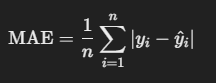

Un MAE de 0 indica una predicción perfecta, sin error.
Cuanto menor sea el valor del MAE, mejor es el rendimiento del modelo en términos de precisión, se mide en las mismas unidades que los datos, lo que facilita su interpretación en contextos prácticos.
El forecast AI_P02F, presenta un MAE promedio de 58.108,79 uds, mientras que el forecast AI_P03F presenta un MAE promedio de 88.756,97 uds.
Teniendo en cuenta que los valores de las ventas mensuales ascienden a millones, podemos concluir que la calidad de las predicciones es buena.

Adjunto una imagen del csv que he creado comparando la suma total mensual de los valores reales y los valores predichos, demostrando la incosistencia de la base de datos.

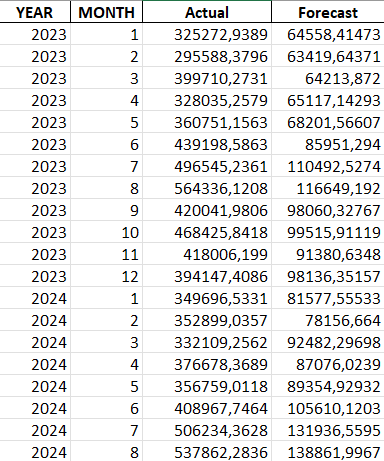

